In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm


### Simple Linear Regression With scikit-learn

In [2]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

model = LinearRegression()

model.fit(x, y)

r_sq = model.score(x, y)

print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.715875613747954


In [3]:
print(f"intercept: {model.intercept_}")

intercept: 5.633333333333329


In [4]:
print(f"slope: {model.coef_}")

slope: [0.54]


In [5]:
y_pred = model.predict(x)
print(f"predicted response:\n{y_pred}")

predicted response:
[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]


In [6]:
y_pred = model.intercept_ + model.coef_ * x
print(f"predicted response:\n{y_pred}")

predicted response:
[[ 8.33333333]
 [13.73333333]
 [19.13333333]
 [24.53333333]
 [29.93333333]
 [35.33333333]]


In [7]:
y_pred = model.intercept_ + model.coef_ * x.reshape(-1)
print(f"predicted response:\n{y_pred}")

predicted response:
[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]


In [8]:
x_new = np.arange(5).reshape((-1, 1))
y_new = model.predict(x_new)
y_new

array([5.63333333, 6.17333333, 6.71333333, 7.25333333, 7.79333333])

### Multiple Linear Regression With scikit-learn

In [9]:
x = [ [0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35] ]

y = [4, 5, 20, 14, 32, 22, 38, 43]

x, y = np.array(x), np.array(y)

In [10]:
model = LinearRegression().fit(x, y)

In [11]:
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.8615939258756775


In [12]:
print(f"intercept: {model.intercept_}")

intercept: 5.52257927519819


In [13]:
print(f"coefficients: {model.coef_}")

coefficients: [0.44706965 0.25502548]


In [14]:
y_pred = model.predict(x)
print(f"predicted response:\n{y_pred}")

predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [15]:
y_pred = model.intercept_ + np.sum(model.coef_ * x, axis=1)
print(f"predicted response:\n{y_pred}")

predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [16]:
x_new = np.arange(10).reshape((-1, 2))
y_new = model.predict(x_new)
y_new

array([ 5.77760476,  7.18179502,  8.58598528,  9.99017554, 11.3943658 ])

### Polynomial regression

In [17]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([15, 11, 2, 8, 25, 32])

In [18]:
transformer = PolynomialFeatures(degree=2, include_bias=False)

In [19]:
transformer.fit(x)
x_ = transformer.transform(x)

In [20]:
x_

array([[   5.,   25.],
       [  15.,  225.],
       [  25.,  625.],
       [  35., 1225.],
       [  45., 2025.],
       [  55., 3025.]])

In [21]:
model = LinearRegression().fit(x_, y)

In [22]:
r_sq = model.score(x_, y)
print(f"coefficient of determination: {r_sq}")

print(f"intercept: {model.intercept_}")

print(f"coefficients: {model.coef_}")

coefficient of determination: 0.8908516262498564
intercept: 21.372321428571425
coefficients: [-1.32357143  0.02839286]


In [23]:
x_ = PolynomialFeatures(degree=2, include_bias=True).fit_transform(x)
x_

array([[1.000e+00, 5.000e+00, 2.500e+01],
       [1.000e+00, 1.500e+01, 2.250e+02],
       [1.000e+00, 2.500e+01, 6.250e+02],
       [1.000e+00, 3.500e+01, 1.225e+03],
       [1.000e+00, 4.500e+01, 2.025e+03],
       [1.000e+00, 5.500e+01, 3.025e+03]])

In [24]:
model = LinearRegression(fit_intercept=False).fit(x_, y)

In [25]:
r_sq = model.score(x_, y)
print(f"coefficient of determination: {r_sq}")

print(f"intercept: {model.intercept_}")

print(f"coefficients: {model.coef_}")

coefficient of determination: 0.8908516262498565
intercept: 0.0
coefficients: [21.37232143 -1.32357143  0.02839286]


In [26]:
y_pred = model.predict(x_)
print(f"predicted response:\n{y_pred}")

predicted response:
[15.46428571  7.90714286  6.02857143  9.82857143 19.30714286 34.46428571]


In [27]:
x = [ [0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]

y = [4, 5, 20, 14, 32, 22, 38, 43]

x, y = np.array(x), np.array(y)

x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)

model = LinearRegression().fit(x_, y)

r_sq = model.score(x_, y)

intercept, coefficients = model.intercept_, model.coef_

y_pred = model.predict(x_)

In [28]:
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {intercept}")
print(f"coefficients:\n{coefficients}")
print(f"predicted response:\n{y_pred}")

coefficient of determination: 0.9453701449127822
intercept: 0.8430556452395734
coefficients:
[ 2.44828275  0.16160353 -0.15259677  0.47928683 -0.4641851 ]
predicted response:
[ 0.54047408 11.36340283 16.07809622 15.79139    29.73858619 23.50834636
 39.05631386 41.92339046]


### Advanced Linear Regression With statsmodels

In [29]:
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]

y = [4, 5, 20, 14, 32, 22, 38, 43]

x, y = np.array(x), np.array(y)

In [30]:
x = sm.add_constant(x)

In [31]:
x

array([[ 1.,  0.,  1.],
       [ 1.,  5.,  1.],
       [ 1., 15.,  2.],
       [ 1., 25.,  5.],
       [ 1., 35., 11.],
       [ 1., 45., 15.],
       [ 1., 55., 34.],
       [ 1., 60., 35.]])

In [32]:
y

array([ 4,  5, 20, 14, 32, 22, 38, 43])

In [33]:
model = sm.OLS(y, x)

In [34]:
results = model.fit()

In [35]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     15.56
Date:                Wed, 11 Oct 2023   Prob (F-statistic):            0.00713
Time:                        00:54:39   Log-Likelihood:                -24.316
No. Observations:                   8   AIC:                             54.63
Df Residuals:                       5   BIC:                             54.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5226      4.431      1.246      0.2

/home/armsjs/anaconda3/envs/DataSciencePortfolio/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [36]:
print(f"coefficient of determination: {results.rsquared}")
print(f"adjusted coefficient of determination: {results.rsquared_adj}")
print(f"regression coefficients: {results.params}")

coefficient of determination: 0.8615939258756777
adjusted coefficient of determination: 0.8062314962259488
regression coefficients: [5.52257928 0.44706965 0.25502548]


In [37]:
print(f"predicted response:\n{results.fittedvalues}")
print(f"predicted response:\n{results.predict(x)}")

predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]
predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [38]:
x_new = sm.add_constant(np.arange(10).reshape((-1, 2)))
x_new

array([[1., 0., 1.],
       [1., 2., 3.],
       [1., 4., 5.],
       [1., 6., 7.],
       [1., 8., 9.]])

In [39]:
y_new = results.predict(x_new)
y_new

array([ 5.77760476,  7.18179502,  8.58598528,  9.99017554, 11.3943658 ])

### [Regularization techniques](https://www.nbshare.io/notebook/819279082/Regularization-Techniques-in-Linear-Regression-With-Python/)

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [41]:
X, y= load_boston(return_X_y=True)
X.shape

/home/armsjs/anaconda3/envs/DataSciencePortfolio/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include

(506, 13)

In [42]:
# Initialize the model
lr = LinearRegression()
# training the model
# we pass in the features as well as the labels we want to map to (remember the CGSO and IQ = GPA example?)
lr.fit(X, y)
# we can now use the model for predictions! We will just give the same predictors
predictions = lr.predict(X)

In [43]:
lr.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [44]:
lr.intercept_

36.459488385089855

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [46]:
def plot_errors(lambdas, train_errors, test_errors, title):
    plt.figure(figsize=(16, 9))
    plt.plot(lambdas, train_errors, label="train")
    plt.plot(lambdas, test_errors, label="test")
    plt.xlabel("$\\lambda$", fontsize=14)
    plt.ylabel("MSE", fontsize=14)
    plt.title(title, fontsize=20)
    plt.legend(fontsize=14)
    plt.show()

In [47]:
def evaluate_model(Model, lambdas):
    training_errors = [] # we will store the error on the training set, for using each different lambda
    testing_errors = [] # and the error on the testing set
    for l in lambdas:
        # in sklearn, they refer to lambda as alpha, the name is different in different literature
        # Model will be either Lasso, Ridge or ElasticNet
        model = Model(alpha=l, max_iter=1000) # we allow max number of iterations until the model converges
        model.fit(X_train, y_train)

        training_predictions = model.predict(X_train)
        training_mse = mean_squared_error(y_train, training_predictions)
        training_errors.append(training_mse)

        testing_predictions = model.predict(X_test)
        testing_mse = mean_squared_error(y_test, testing_predictions)
        testing_errors.append(testing_mse)
    return training_errors, testing_errors

/tmp/ipykernel_15825/589711590.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X_train, y_train)
/home/armsjs/anaconda3/envs/DataSciencePortfolio/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/armsjs/anaconda3/envs/DataSciencePortfolio/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.237e+03, tolerance: 3.585e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = 

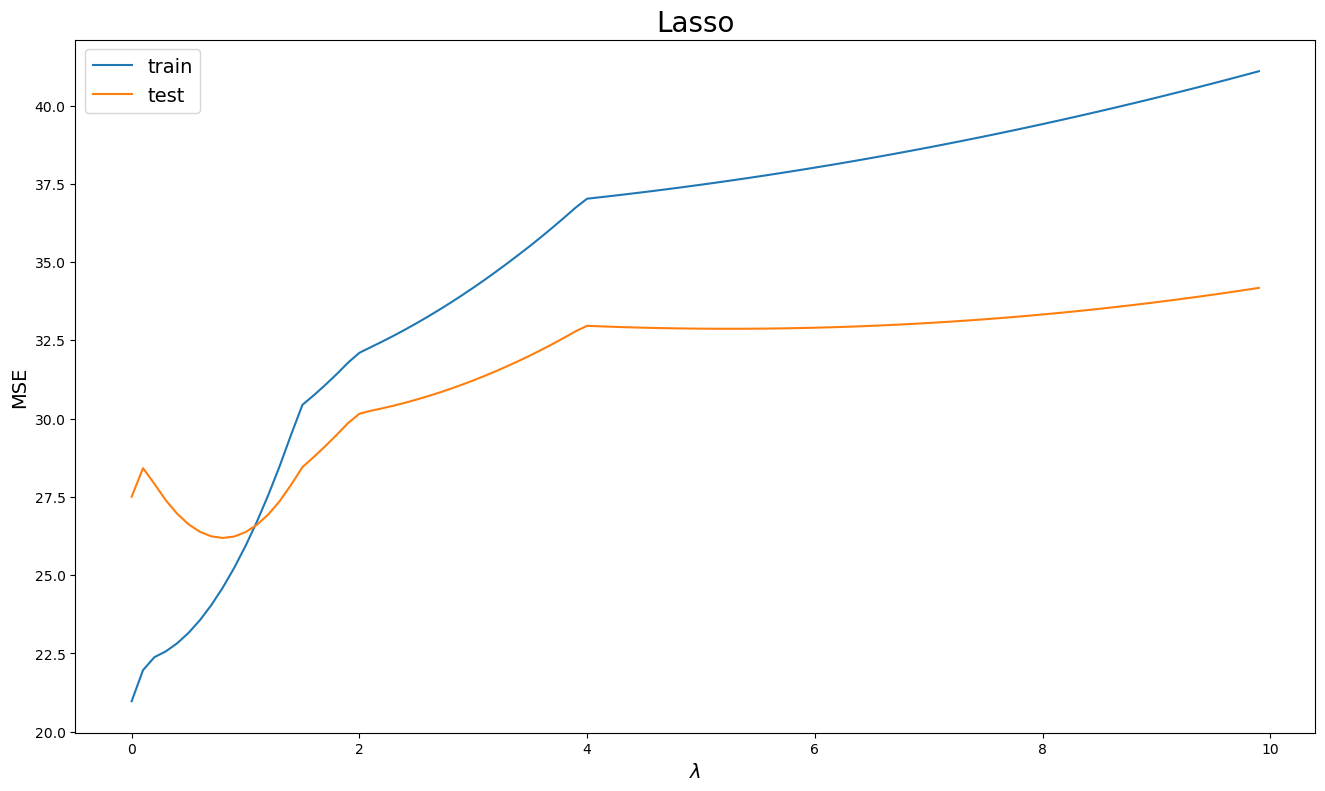

In [48]:
lambdas = np.arange(0, 10, step=0.1)

lasso_train, lasso_test = evaluate_model(Lasso, lambdas)
plot_errors(lambdas, lasso_train, lasso_test, "Lasso")

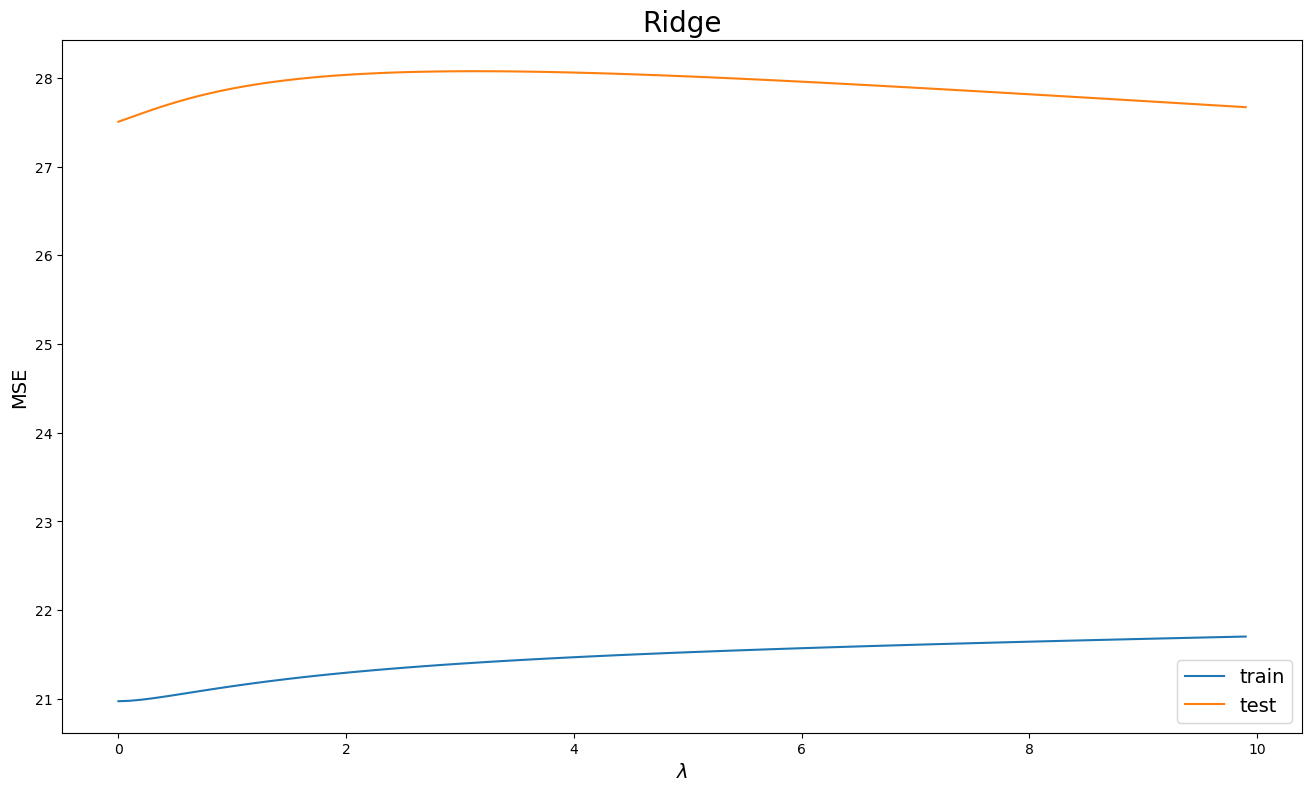

In [49]:
lambdas = np.arange(0, 10, step=0.1)

ridge_train, ridge_test = evaluate_model(Ridge, lambdas)
plot_errors(lambdas, ridge_train, ridge_test, "Ridge")

/tmp/ipykernel_15825/589711590.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X_train, y_train)
/home/armsjs/anaconda3/envs/DataSciencePortfolio/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/armsjs/anaconda3/envs/DataSciencePortfolio/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.237e+03, tolerance: 3.585e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = 

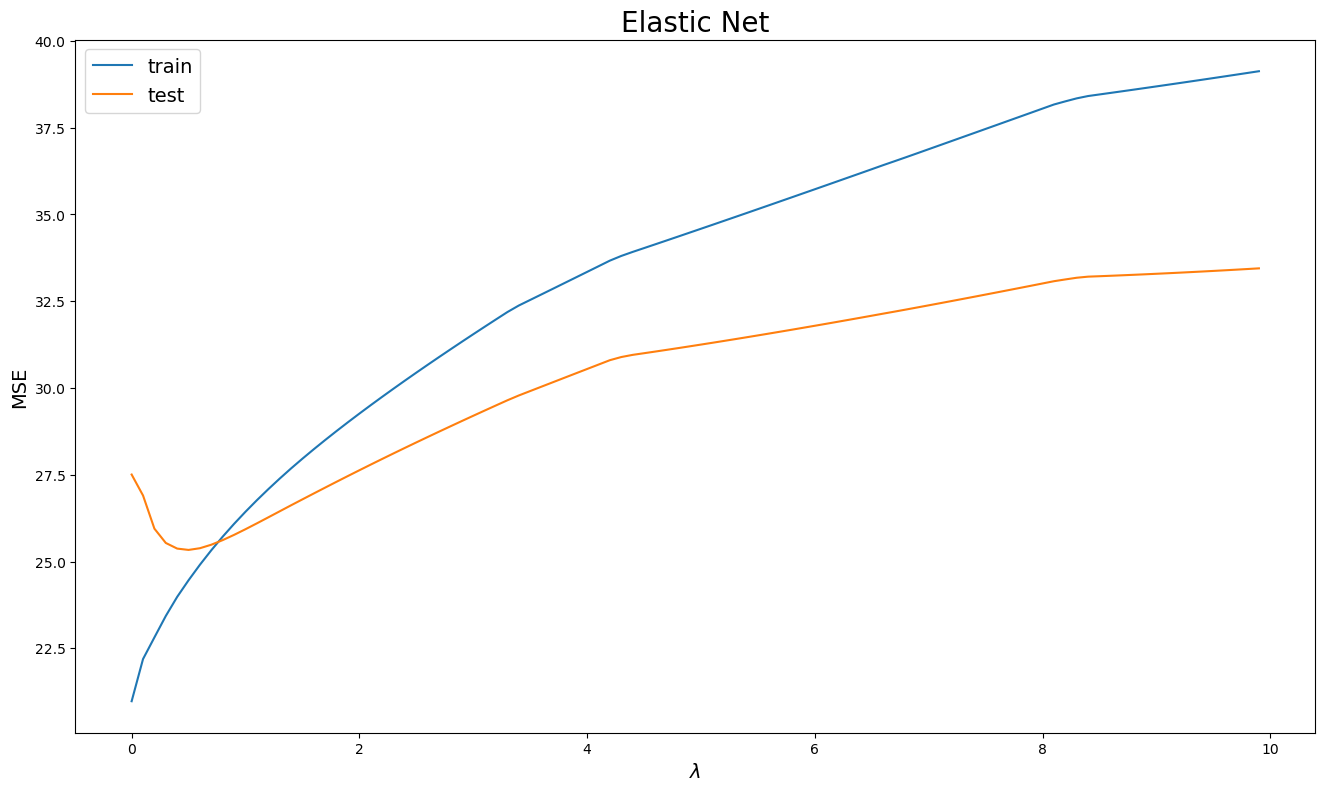

In [50]:
# let's generate different values for lambda from 0 (no-regularization) and (10 too much regularization)
lambdas = np.arange(0, 10, step=0.1)

elastic_train, elastic_test = evaluate_model(ElasticNet, lambdas)
plot_errors(lambdas, elastic_train, elastic_test, "Elastic Net")